In [63]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib as plt

In [64]:
import os, sys
os.getcwd()
rpath = os.path.abspath('../')
if rpath not in sys.path:
    sys.path.insert(0,rpath)

In [65]:
# Construct the file path
file_path = os.path.join(rpath, 'data', 'raw_news_data','raw_analyst_ratings.csv')

# Read the CSV file into a DataFrame
data = pd.read_csv(file_path)
data = data[['date','headline','url','publisher','stock']]
data.head()

,date,headline,url,publisher,stock
0,2020-06-05 10:30:54-04:00,Stocks That Hit 52-Week Highs On Friday,https://www.benzinga.com/news/20/06/16190091/s...,Benzinga Insights,A
1,2020-06-03 10:45:20-04:00,Stocks That Hit 52-Week Highs On Wednesday,https://www.benzinga.com/news/20/06/16170189/s...,Benzinga Insights,A
2,2020-05-26 04:30:07-04:00,71 Biggest Movers From Friday,https://www.benzinga.com/news/20/05/16103463/7...,Lisa Levin,A
3,2020-05-22 12:45:06-04:00,46 Stocks Moving In Friday's Mid-Day Session,https://www.benzinga.com/news/20/05/16095921/4...,Lisa Levin,A
4,2020-05-22 11:38:59-04:00,B of A Securities Maintains Neutral on Agilent...,https://www.benzinga.com/news/20/05/16095304/b...,Vick Meyer,A


**Descriptive Statistics**

In [66]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1407328 entries, 0 to 1407327
Data columns (total 5 columns):
 #   Column     Non-Null Count    Dtype 
---  ------     --------------    ----- 
 0   date       1407328 non-null  object
 1   headline   1407328 non-null  object
 2   url        1407328 non-null  object
 3   publisher  1407328 non-null  object
 4   stock      1407328 non-null  object
dtypes: object(5)
memory usage: 53.7+ MB


In [67]:
data['headline_length'] = data['headline'].apply(len)
# Descriptive statistics for headline length
headline_stats = data['headline_length'].describe()
article_count_by_publisher = data['publisher'].value_counts()
print(headline_stats)
print(article_count_by_publisher)
data.head()

count    1.407328e+06
mean     7.312051e+01
std      4.073531e+01
min      3.000000e+00
25%      4.700000e+01
50%      6.400000e+01
75%      8.700000e+01
max      5.120000e+02
Name: headline_length, dtype: float64
publisher
Paul Quintaro        228373
Lisa Levin           186979
Benzinga Newsdesk    150484
Charles Gross         96732
Monica Gerson         82380
                      ...  
MoneyGeek                 1
muathe                    1
Robert Morris             1
LeftCoastHedgie           1
Jeremie Capron            1
Name: count, Length: 1034, dtype: int64


,date,headline,url,publisher,stock,headline_length
0,2020-06-05 10:30:54-04:00,Stocks That Hit 52-Week Highs On Friday,https://www.benzinga.com/news/20/06/16190091/s...,Benzinga Insights,A,39
1,2020-06-03 10:45:20-04:00,Stocks That Hit 52-Week Highs On Wednesday,https://www.benzinga.com/news/20/06/16170189/s...,Benzinga Insights,A,42
2,2020-05-26 04:30:07-04:00,71 Biggest Movers From Friday,https://www.benzinga.com/news/20/05/16103463/7...,Lisa Levin,A,29
3,2020-05-22 12:45:06-04:00,46 Stocks Moving In Friday's Mid-Day Session,https://www.benzinga.com/news/20/05/16095921/4...,Lisa Levin,A,44
4,2020-05-22 11:38:59-04:00,B of A Securities Maintains Neutral on Agilent...,https://www.benzinga.com/news/20/05/16095304/b...,Vick Meyer,A,87


In [68]:
data.shape

(1407328, 6)

date
2009-02-14      1
2009-04-27      2
2009-04-29      1
2009-05-22      1
2009-05-27      6
             ... 
2020-06-07     25
2020-06-08    765
2020-06-09    804
2020-06-10    806
2020-06-11    544
Name: count, Length: 3955, dtype: int64


<Figure size 700x500 with 0 Axes>

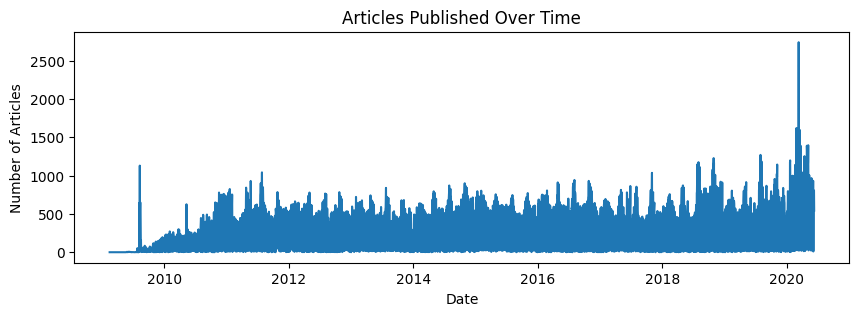

articles_per_month
date
2009-02        1
2009-04        3
2009-05       12
2009-06       40
2009-07       75
           ...  
2020-02    18879
2020-03    24994
2020-04    20757
2020-05    17992
2020-06     6447
Freq: M, Name: count, Length: 136, dtype: int64


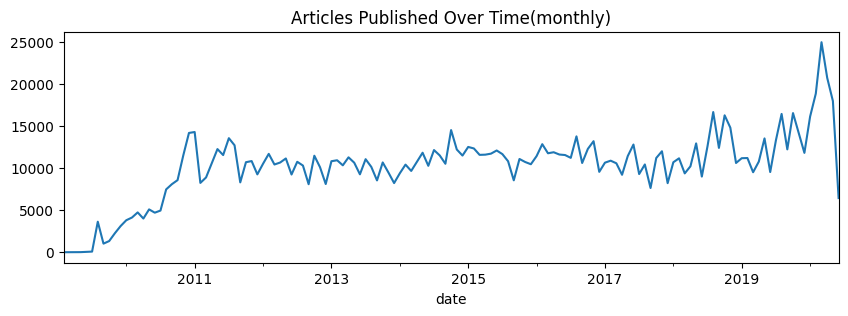

In [132]:
import matplotlib.pyplot as plt
# Convert the column to datetime
dta_for_analysis = data.copy()
dta_for_analysis['date'] = pd.to_datetime(dta_for_analysis['date'], format='ISO8601')
# Eract only the date
dta_for_analysis['date'] = dta_for_analysis['date'].dt.date

# Plot Close price and MACD
plt.figure(figsize=(7, 5))
fig, ax = plt.subplots()
# Count articles per day
articles_per_day = dta_for_analysis['date'].value_counts().sort_index()
print(articles_per_day)

# Optional: Plotting the trend over time
articles_per_day.plot(kind='line',figsize=(10, 3), title='Articles Published Over Time')
ax.set_xlabel('Date')
ax.set_ylabel('Number of Articles')
plt.show()


# Convert the date column to datetime if it's not already
dta_for_analysis['date'] = pd.to_datetime(dta_for_analysis['date'])

# Set the date as the index
dta_for_analysis.set_index('date', inplace=True)

# Now convert the index to a period and count articles per month
articles_per_month = dta_for_analysis.index.to_period('M').value_counts().sort_index()
print('articles_per_month')
print(articles_per_month)
# Optional: Plotting the trend over time
articles_per_month.plot(kind='line',figsize=(10, 3), title='Articles Published Over Time(monthly)')
ax.set_xlabel('Date')
ax.set_ylabel('Number of Articles')
plt.show()

**Text Analysis(Sentiment analysis & Topic Modeling)**

In [70]:
import nltk
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\AII\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [71]:
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
sentiment_data=data.copy()
sia = SentimentIntensityAnalyzer()

# Calculate the sentiment of the headlines
sentiment_data['sentiment'] = sentiment_data['headline'].apply(lambda x: sia.polarity_scores(text=x)['compound'])
# Categorize the sentiment scores
sentiment_data['sentiment_category'] = pd.cut(sentiment_data['sentiment'], bins=[-1, -0.5, -0.0001, 0.5, 1], labels=['Very Negative', 'Negative', 'Neutral', 'Positive'])
sentiment_data

,date,headline,url,publisher,stock,headline_length,sentiment,sentiment_category
0,2020-06-05 10:30:54-04:00,Stocks That Hit 52-Week Highs On Friday,https://www.benzinga.com/news/20/06/16190091/s...,Benzinga Insights,A,39,0.0000,Neutral
1,2020-06-03 10:45:20-04:00,Stocks That Hit 52-Week Highs On Wednesday,https://www.benzinga.com/news/20/06/16170189/s...,Benzinga Insights,A,42,0.0000,Neutral
2,2020-05-26 04:30:07-04:00,71 Biggest Movers From Friday,https://www.benzinga.com/news/20/05/16103463/7...,Lisa Levin,A,29,0.0000,Neutral
3,2020-05-22 12:45:06-04:00,46 Stocks Moving In Friday's Mid-Day Session,https://www.benzinga.com/news/20/05/16095921/4...,Lisa Levin,A,44,0.0000,Neutral
4,2020-05-22 11:38:59-04:00,B of A Securities Maintains Neutral on Agilent...,https://www.benzinga.com/news/20/05/16095304/b...,Vick Meyer,A,87,0.2960,Neutral
...,...,...,...,...,...,...,...,...
1407323,2011-08-29 00:00:00,Top Narrow Based Indexes For August 29,https://www.benzinga.com/news/11/08/1888782/to...,Monica Gerson,ZX,38,0.2023,Neutral
1407324,2011-06-22 00:00:00,Recap: Wednesday's Top Percentage Gainers and ...,https://www.benzinga.com/news/earnings/11/06/1...,Benjamin Lee,ZX,52,-0.3818,Negative
1407325,2011-06-21 00:00:00,UPDATE: Oppenheimer Color on China Zenix Auto ...,https://www.benzinga.com/analyst-ratings/analy...,BenzingaStaffL,ZX,56,0.0000,Neutral
1407326,2011-06-21 00:00:00,Oppenheimer Initiates China Zenix At Outperfor...,https://www.benzinga.com/analyst-ratings/price...,Joe Young,ZX,54,0.0000,Neutral


sentiment_category
Neutral          1070915
Negative          182864
Positive          109718
Very Negative      43831
Name: count, dtype: int64
                                            headline  sentiment
0            Stocks That Hit 52-Week Highs On Friday      0.000
1         Stocks That Hit 52-Week Highs On Wednesday      0.000
2                      71 Biggest Movers From Friday      0.000
3       46 Stocks Moving In Friday's Mid-Day Session      0.000
4  B of A Securities Maintains Neutral on Agilent...      0.296
sentiment
 0.0000    731893
 0.2960     72327
 0.2023     69102
-0.1280     28326
 0.2732     25827
Name: count, dtype: int64
sentiment                   -0.9578  -0.9552  -0.9545  -0.9497  -0.9485  \
publisher                                                                 
47ertrends                      0.0      0.0      0.0      0.0      0.0   
AARP                            0.0      0.0      0.0      0.0      0.0   
ABNNewswire                     0.0      0.0 

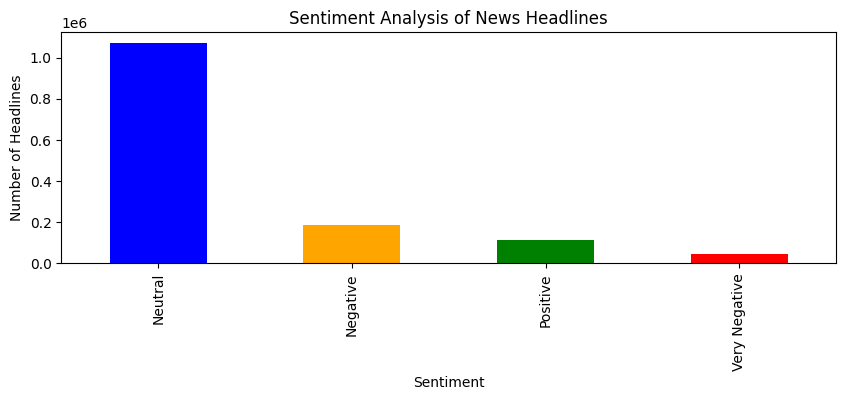

In [131]:
sentiment_distribution = sentiment_data['sentiment_category'].value_counts()
print(sentiment_distribution)

# Display the result
print(sentiment_data[['headline', 'sentiment']].head())

# Count the sentiment distribution
sentiment_distribution_ = sentiment_data['sentiment'].value_counts()
print(sentiment_distribution_.head())

# Analyze sentiment by publisher
sentiment_by_publisher = sentiment_data.groupby('publisher')['sentiment'].value_counts().unstack().fillna(0)
print(sentiment_by_publisher)

import matplotlib.pyplot as plt
sentiment_distribution.plot(kind='bar',figsize=(10, 3), color=['blue', 'orange','green', 'red'])
plt.xlabel('Sentiment')
plt.ylabel('Number of Headlines')
plt.title('Sentiment Analysis of News Headlines')
plt.show()

sentiment_category  Very Negative  Negative  Neutral  Positive
stock                                                         
AAPL                           26        74      298        43
AMZN                           11        38      201        28
GOOG                           50       169      840       140
NVDA                          103       369     2393       281
TSLA                           64       221     1418       172


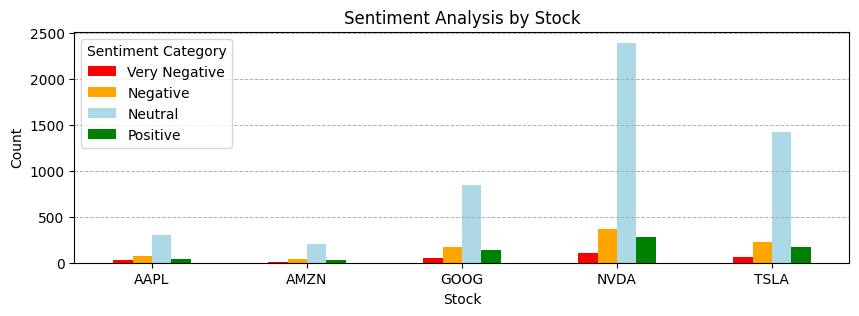

In [73]:
# List of specific stocks to analyze
selected_stocks = ['AAPL', 'NVDA', 'META', 'AMZN', 'GOOG', 'TSLA', 'MSFT']
filtered_data = sentiment_data[sentiment_data['stock'].isin(selected_stocks)]
sentiment_by_publisher = filtered_data.groupby('stock')['sentiment_category'].value_counts().unstack().fillna(0)
print(sentiment_by_publisher)

import pandas as pd
import matplotlib.pyplot as plt

df = pd.DataFrame(sentiment_by_publisher)

# Plotting the bar graph
ax = df.plot(kind='bar', figsize=(10, 3), color=['red', 'orange','lightblue','green'])

# Setting the title and labels
plt.title('Sentiment Analysis by Stock')
plt.xlabel('Stock')
plt.ylabel('Count')
plt.xticks(rotation=0)  # Rotate x-axis labels to 0 degrees for better readability

# Adding legend and grid
plt.legend(title='Sentiment Category')
plt.grid(axis='y', linestyle='--', linewidth=0.7)

# Display the plot
plt.show()


sentiment_category  Very Negative  Negative  Neutral  Positive
publisher                                                     
Benzinga Newsdesk            6231     32822    93848     17583
Charles Gross                2779      9873    75986      8094
Lisa Levin                   8967     22439   150640      4933
Monica Gerson                1242      9221    68184      3733
Paul Quintaro                4770     21346   181608     20649


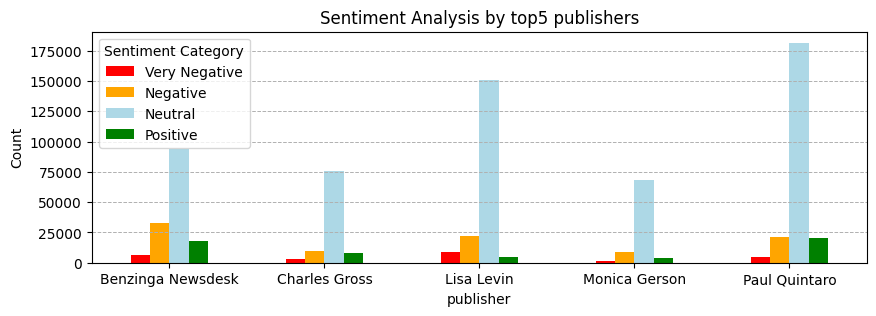

In [74]:
# Assuming you have the top 5 publishers from your previous analysis
top_publishers = ['Paul Quintaro', 'Lisa Levin', 'Benzinga Newsdesk', 'Charles Gross', 'Monica Gerson']
# Filter data for top 5 publishers
top_publishers_data = sentiment_data[sentiment_data['publisher'].isin(top_publishers)]
# Group by publisher and sentiment category
sentiment_by_top_publishers = top_publishers_data.groupby('publisher')['sentiment_category'].value_counts().unstack().fillna(0)

# Display the sentiment distribution for the top 5 publishers
print(sentiment_by_top_publishers)

df = pd.DataFrame(sentiment_by_top_publishers)

# Plotting the bar graph
ax = df.plot(kind='bar', figsize=(10, 3),color=['red', 'orange','lightblue','green'])

# Setting the title and labels
plt.title('Sentiment Analysis by top5 publishers')
plt.xlabel('publisher')
plt.ylabel('Count')
plt.xticks(rotation=0)  # Rotate x-axis labels to 0 degrees for better readability

# Adding legend and grid
plt.legend(title='Sentiment Category')
plt.grid(axis='y', linestyle='--', linewidth=0.7)

# Display the plot
plt.show()


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\AII\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\AII\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


0                     stocks that hit 52week highs on friday
1                  stocks that hit 52week highs on wednesday
2                              71 biggest movers from friday
3                 46 stocks moving in fridays midday session
4          b of a securities maintains neutral on agilent...
                                 ...                        
1407323               top narrow based indexes for august 29
1407324    recap wednesdays top percentage gainers and lo...
1407325    update oppenheimer color on china zenix auto i...
1407326    oppenheimer initiates china zenix at outperfor...
1407327    china zenix auto international opens for tradi...
Name: cleaned_headline, Length: 1407328, dtype: object
     keyword   count
49        vs  162061
43    stocks  161868
13       est  140578
12       eps  128910
41    shares  114182
35   reports  108705
47    update   91680
20    market   90879
9   earnings   87185
36     sales   79524


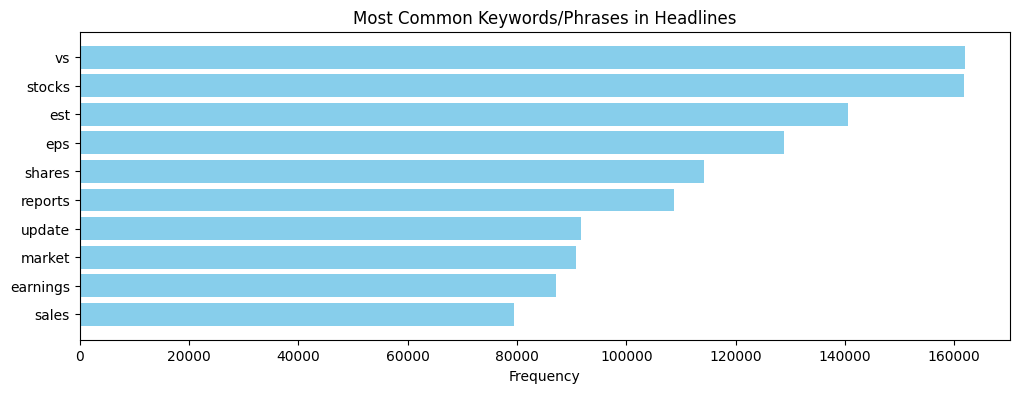

In [142]:
from sklearn.feature_extraction.text import CountVectorizer
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import re

# Download NLTK resources
nltk.download('punkt')
nltk.download('stopwords')

# Function to preprocess text
def preprocess_text(text):
    # Remove punctuation and numbers
    text = re.sub(r'[^\w\s]', '', text)
    # Convert to lowercase
    text = text.lower()
    return text

# Apply preprocessing to the headlines
sentiment_data['cleaned_headline'] = sentiment_data['headline'].apply(preprocess_text)

# Display the cleaned headlines
print(sentiment_data['cleaned_headline'])

# Initialize CountVectorizer to extract keywords
vectorizer = CountVectorizer(stop_words='english', ngram_range=(1, 2), max_features=50)

# Fit and transform the cleaned headlines
X = vectorizer.fit_transform(sentiment_data['cleaned_headline'])

# Get the feature names (keywords and phrases)
keywords = vectorizer.get_feature_names_out()

# Sum the occurrences of each keyword/phrase across all headlines
keyword_counts = X.toarray().sum(axis=0)

# Create a sentiment_dataFrame for keyword frequency
keyword_frequency = pd.DataFrame({'keyword': keywords, 'count': keyword_counts})
keyword_frequency = keyword_frequency.sort_values(by='count', ascending=False)

# Display the most common keywords or phrases
print(keyword_frequency.head(10))

import matplotlib.pyplot as plt

# Plot the most common keywords
plt.figure(figsize=(12, 4))
plt.barh(keyword_frequency['keyword'].head(10), keyword_frequency['count'].head(10), color='skyblue')
plt.xlabel('Frequency')
plt.title('Most Common Keywords/Phrases in Headlines')
plt.gca().invert_yaxis()  # Invert y-axis for better readability
plt.show()


**Time Series Analysis**

In [76]:
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose

time_series_data = data.copy()
time_series_data['date'] = pd.to_datetime(time_series_data['date'], format='ISO8601', errors='coerce')
time_series_data['date_only'] = time_series_data['date'].dt.date
time_series_data['hour'] = time_series_data['date'].dt.hour
time_series_time_series_data = time_series_data.set_index('date_only').sort_index()
time_series_data.head()


,date,headline,url,publisher,stock,headline_length,date_only,hour
0,2020-06-05 10:30:54-04:00,Stocks That Hit 52-Week Highs On Friday,https://www.benzinga.com/news/20/06/16190091/s...,Benzinga Insights,A,39,2020-06-05,10
1,2020-06-03 10:45:20-04:00,Stocks That Hit 52-Week Highs On Wednesday,https://www.benzinga.com/news/20/06/16170189/s...,Benzinga Insights,A,42,2020-06-03,10
2,2020-05-26 04:30:07-04:00,71 Biggest Movers From Friday,https://www.benzinga.com/news/20/05/16103463/7...,Lisa Levin,A,29,2020-05-26,4
3,2020-05-22 12:45:06-04:00,46 Stocks Moving In Friday's Mid-Day Session,https://www.benzinga.com/news/20/05/16095921/4...,Lisa Levin,A,44,2020-05-22,12
4,2020-05-22 11:38:59-04:00,B of A Securities Maintains Neutral on Agilent...,https://www.benzinga.com/news/20/05/16095304/b...,Vick Meyer,A,87,2020-05-22,11


date
2009-02-14 00:00:00-04:00    1
2009-04-27 00:00:00-04:00    2
2009-04-29 00:00:00-04:00    1
2009-05-22 00:00:00-04:00    1
2009-05-27 00:00:00-04:00    6
                            ..
2020-06-11 16:49:41-04:00    1
2020-06-11 16:51:33-04:00    1
2020-06-11 17:01:39-04:00    1
2020-06-11 17:11:20-04:00    1
2020-06-11 17:12:35-04:00    1
Name: count, Length: 39957, dtype: int64


C:\Users\AII\AppData\Local\Temp\ipykernel_14436\3460327892.py:8: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  articles_per_month = articles_per_day.resample('M').sum()


<Figure size 700x500 with 0 Axes>

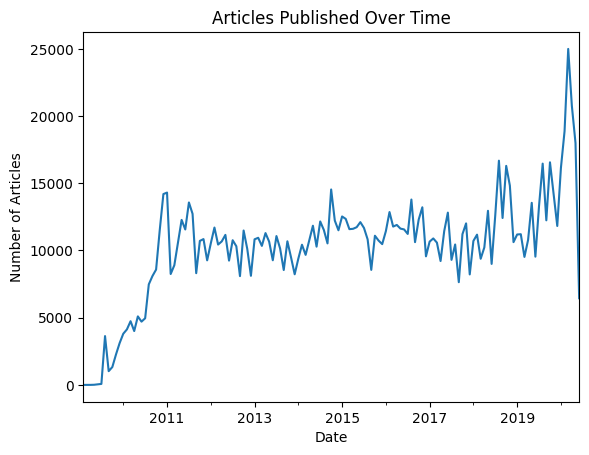

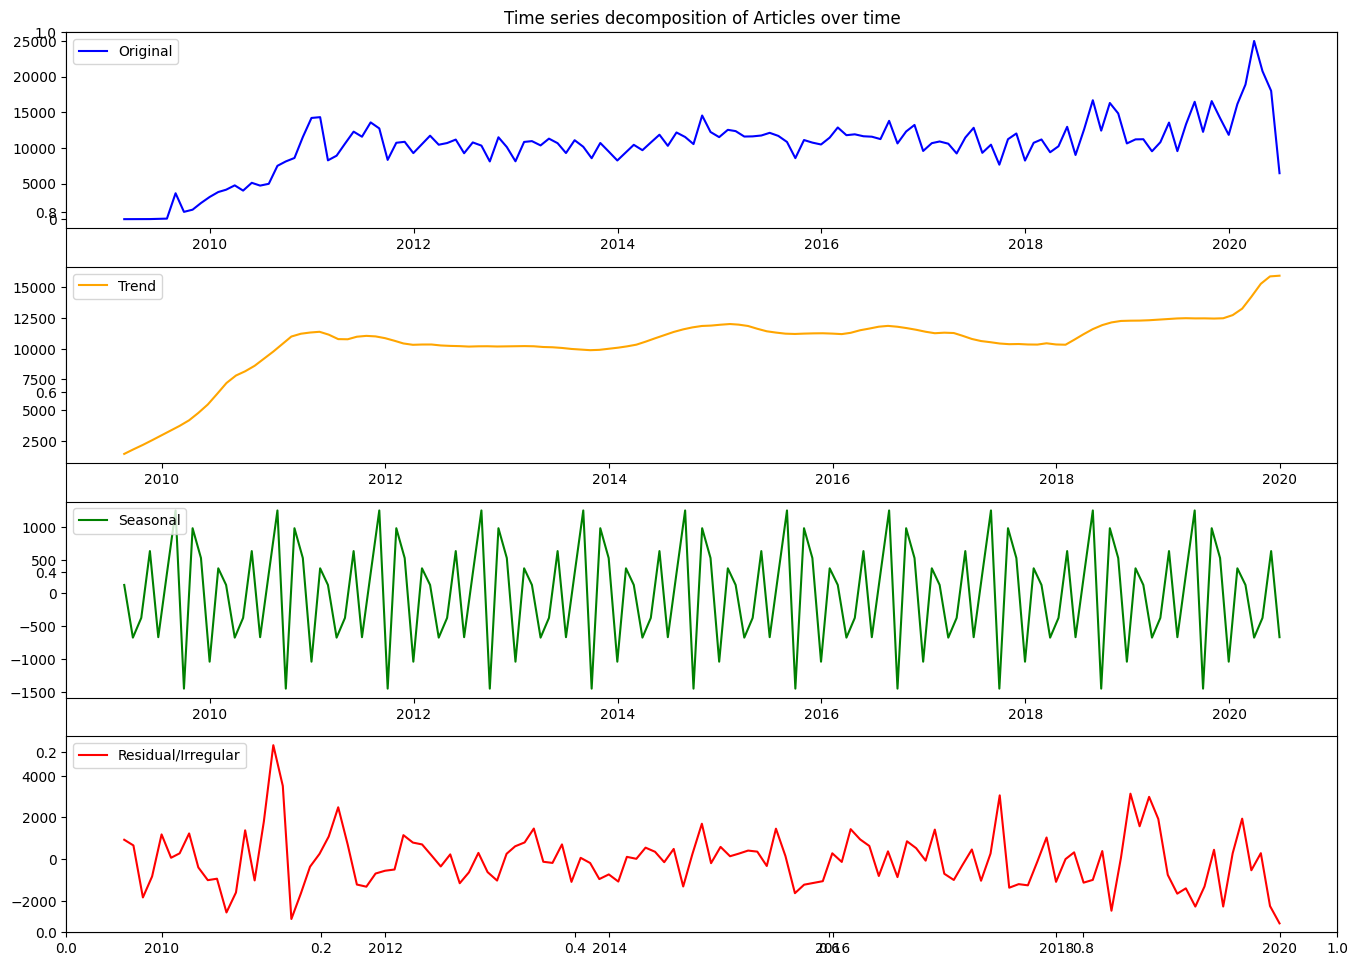

In [144]:
# Plot Close price and MACD
plt.figure(figsize=(7, 5))
fig, ax = plt.subplots()
# Count articles per day
articles_per_day = time_series_data['date'].value_counts().sort_index()
print(articles_per_day)

articles_per_month = articles_per_day.resample('M').sum()

# Optional: Plotting the trend over time
articles_per_month.plot(kind='line', title='Articles Published Over Time')
ax.set_xlabel('Date')
ax.set_ylabel('Number of Articles')
plt.show()


decomposition = seasonal_decompose(articles_per_month, model='additive', period=12)

# Plotting the components
plt.figure(figsize=(14, 10))
plt.title('Time series decomposition of Articles over time')

plt.subplot(411)
plt.plot(articles_per_month, label='Original', color='blue')
plt.legend(loc='upper left')

plt.subplot(412)
plt.plot(decomposition.trend, label='Trend', color='orange')
plt.legend(loc='upper left')

plt.subplot(413)
plt.plot(decomposition.seasonal, label='Seasonal', color='green')
plt.legend(loc='upper left')

plt.subplot(414)
plt.plot(decomposition.resid, label='Residual/Irregular', color='red')
plt.legend(loc='upper left')

plt.tight_layout()
plt.show()


hour
0     1351408
1          14
2          57
3          93
4        1469
5        1829
6        2476
7        5033
8        5527
9        5965
10       7669
11       5701
12       5732
13       2710
14       2075
15       1612
16       3939
17       2800
18        704
19        227
20        131
21         82
22         48
23         27
Name: count, dtype: int64


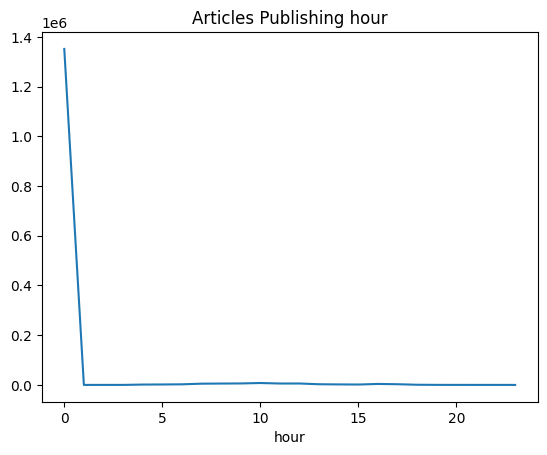

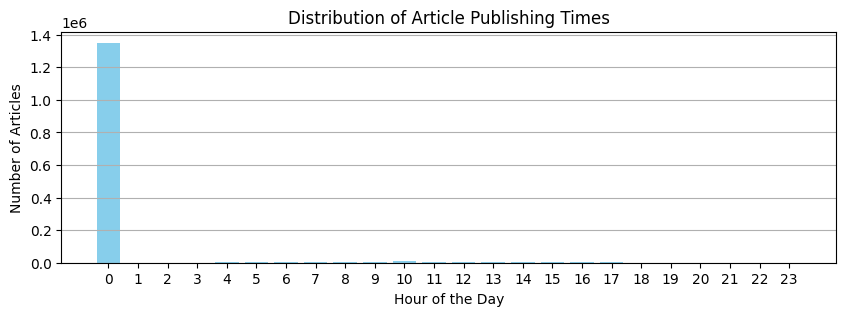

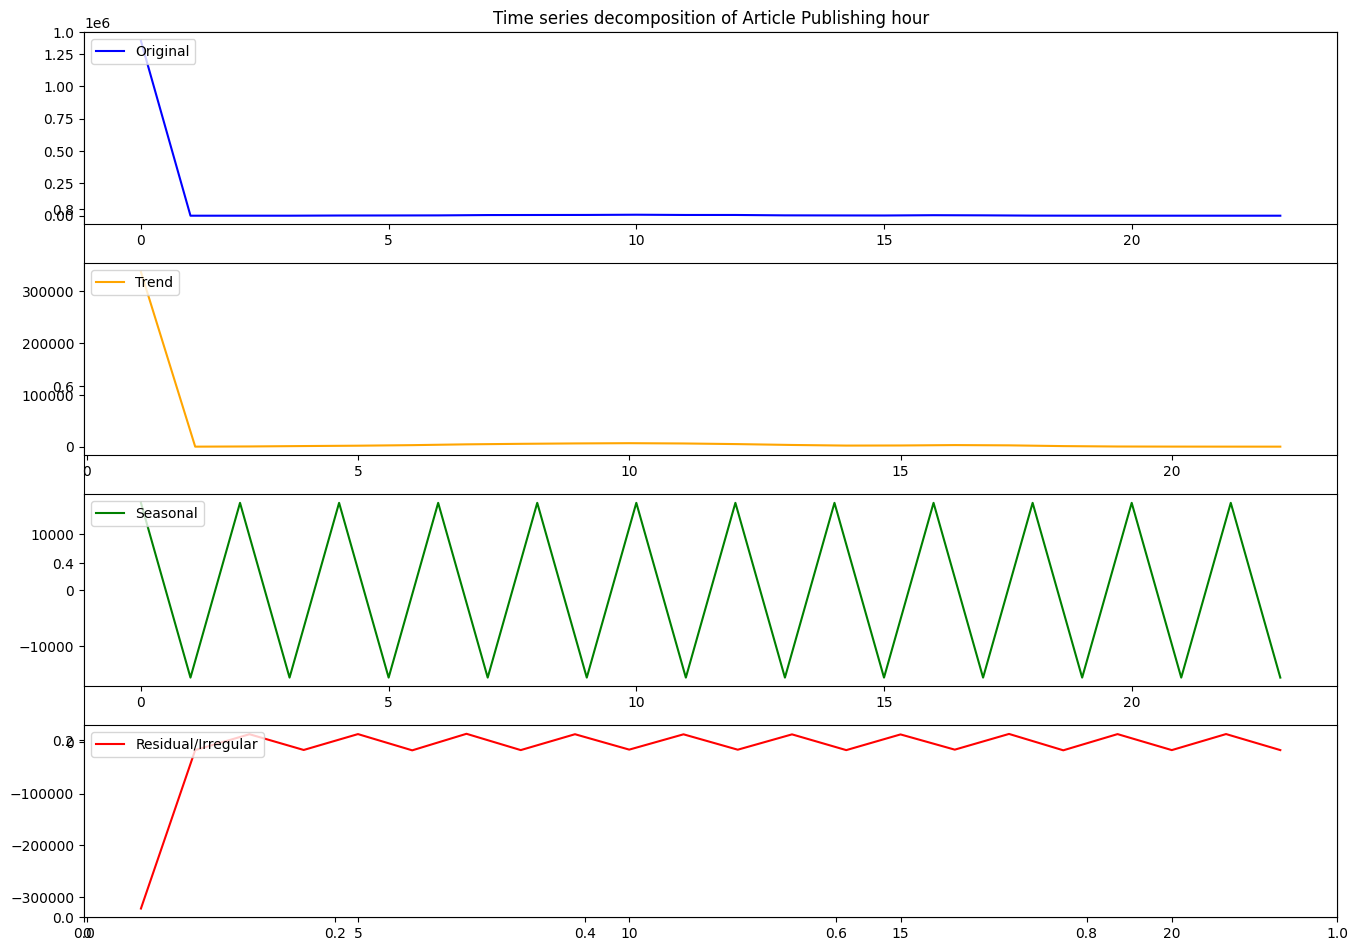

In [112]:
# Count the number of articles published at each hour
articles_per_hour = time_series_data['hour'].value_counts().sort_index()
# Display the distribution
print(articles_per_hour)

# Optional: Plotting the trend over time
articles_per_hour.plot(kind='line', title='Articles Publishing hour')
ax.set_xlabel('Date')
ax.set_ylabel('Number of Articles')
plt.show()

# Plot the number of articles published at each hour
plt.figure(figsize=(10, 3))
plt.bar(articles_per_hour.index, articles_per_hour.values, color='skyblue')
plt.xlabel('Hour of the Day')
plt.ylabel('Number of Articles')
plt.title('Distribution of Article Publishing Times')
plt.xticks(range(24))  # Ensure all 24 hours are shown
plt.grid(axis='y')
plt.show()

decomposition = seasonal_decompose(articles_per_hour, model='additive', period=2)

# Plotting the components
plt.figure(figsize=(14, 10))
plt.title('Time series decomposition of Article Publishing hour')

plt.subplot(411)
plt.plot(articles_per_hour, label='Original', color='blue')
plt.legend(loc='upper left')

plt.subplot(412)
plt.plot(decomposition.trend, label='Trend', color='orange')
plt.legend(loc='upper left')

plt.subplot(413)
plt.plot(decomposition.seasonal, label='Seasonal', color='green')
plt.legend(loc='upper left')

plt.subplot(414)
plt.plot(decomposition.resid, label='Residual/Irregular', color='red')
plt.legend(loc='upper left')

plt.tight_layout()
plt.show()


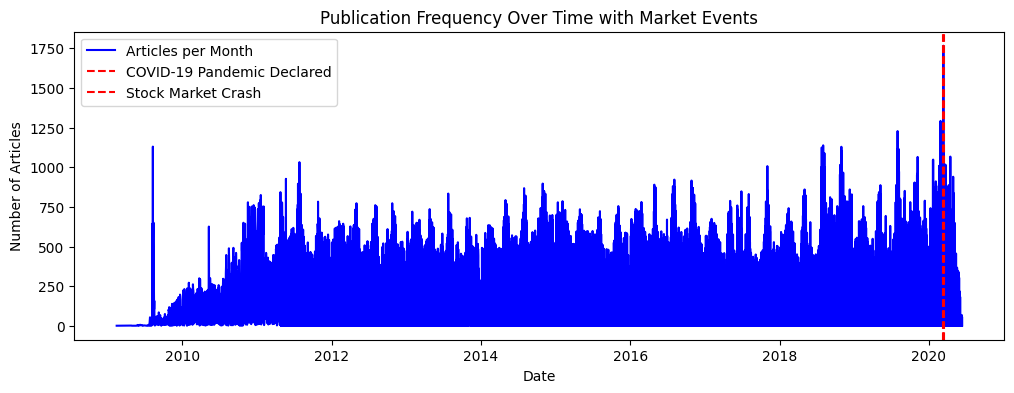

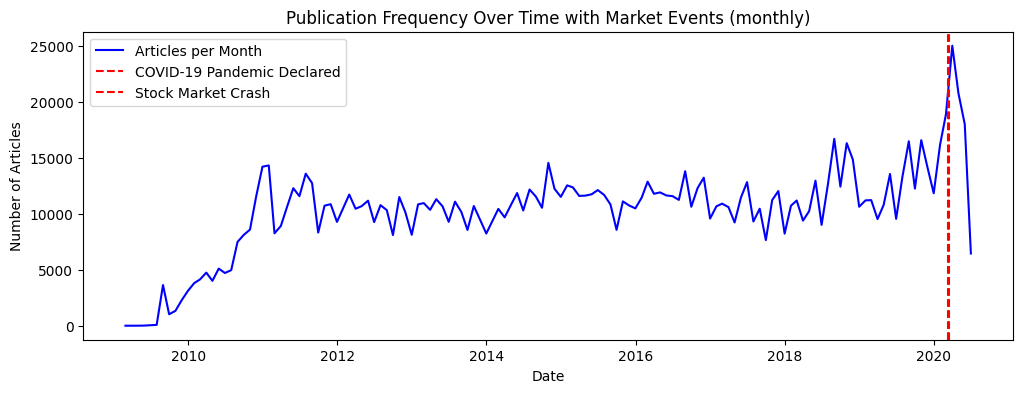

In [148]:
# Example: Known market events
market_events = {
    'COVID-19 Pandemic Declared': '2020-03-11',
    'Stock Market Crash': '2020-03-16'
}

# Convert the event dates to datetime
market_events = {event: pd.to_datetime(date) for event, date in market_events.items()}

# Plot the number of articles published each day with event markers
plt.figure(figsize=(12, 4))
plt.plot(articles_per_day.index, articles_per_day.values, label='Articles per Month', color='blue')
for event, date in market_events.items():
    plt.axvline(x=date, color='red', linestyle='--', label=event)
plt.xlabel('Date')
plt.ylabel('Number of Articles')
plt.title('Publication Frequency Over Time with Market Events')
plt.legend()
plt.show()

# Plot the number of articles published each day with event markers
plt.figure(figsize=(12, 4))
plt.plot(articles_per_month.index, articles_per_month.values, label='Articles per Month', color='blue')
for event, date in market_events.items():
    plt.axvline(x=date, color='red', linestyle='--', label=event)
plt.xlabel('Date')
plt.ylabel('Number of Articles')
plt.title('Publication Frequency Over Time with Market Events (monthly)')
plt.legend()
plt.show()


**Publisher Analysis**

publisher
Paul Quintaro        228373
Lisa Levin           186979
Benzinga Newsdesk    150484
Charles Gross         96732
Monica Gerson         82380
                      ...  
MoneyGeek                 1
muathe                    1
Robert Morris             1
LeftCoastHedgie           1
Jeremie Capron            1
Name: count, Length: 1034, dtype: int64


<module 'matplotlib.pyplot' from 'c:\\Users\\AII\\Desktop\\financial-news-data-analysis\\venv\\lib\\site-packages\\matplotlib\\pyplot.py'>

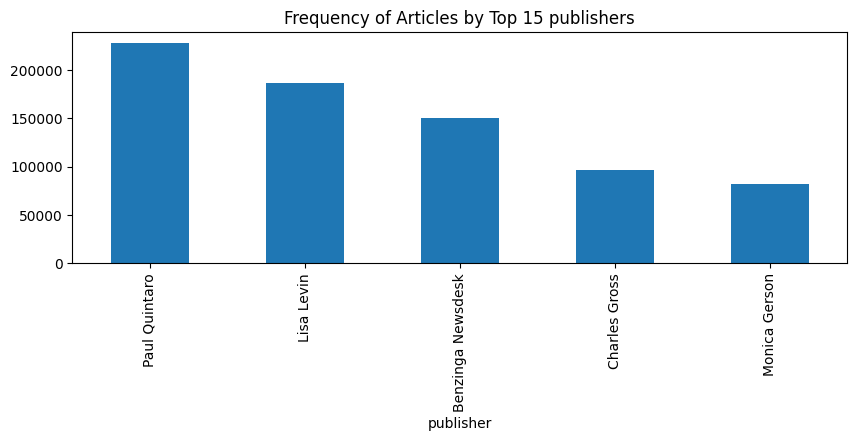

In [149]:
# Count the number of articles per publisher
articles_per_publisher = data['publisher'].value_counts()

# Display the result
print(articles_per_publisher)


# Select the top 10 domains
top_15_publishers = articles_per_publisher.head(5)
# Plot the results for the top 10 domains
top_15_publishers.plot(kind='bar', figsize=(10, 3))
plt.title('Frequency of Articles by Top 15 publishers')
plt

domain
benzinga.com              7937
gmail.com                  139
andyswan.com                 5
investdiva.com               2
tothetick.com                2
eosdetroit.io                1
forextraininggroup.com       1
stockmetrix.net              1
Name: count, dtype: int64

Publisher Names in Top 10 Domains:

Domain: benzinga.com
Publishers: vishwanath@benzinga.com, luke@benzinga.com, bret.kenwell@benzinga.com, newsdesk+benzingastaffwriter3@benzinga.com, aefimoff@benzinga.com, andrewbeghou@benzinga.com, shivdeep@benzinga.com, dhiraj.surapaneni@benzinga.com, javierhasseandericterbush@benzinga.com

Domain: gmail.com
Publishers: vivek.proactive@gmail.com, richa28dhand@gmail.com, jennifer25anthony@gmail.com

Domain: andyswan.com
Publishers: Andy@andyswan.com

Domain: investdiva.com
Publishers: kiana@investdiva.com

Domain: tothetick.com
Publishers: andrew@tothetick.com

Domain: eosdetroit.io
Publishers: adam@eosdetroit.io

Domain: forextraininggroup.com
Publishers: vic@forextraining

<module 'matplotlib.pyplot' from 'c:\\Users\\AII\\Desktop\\financial-news-data-analysis\\venv\\lib\\site-packages\\matplotlib\\pyplot.py'>

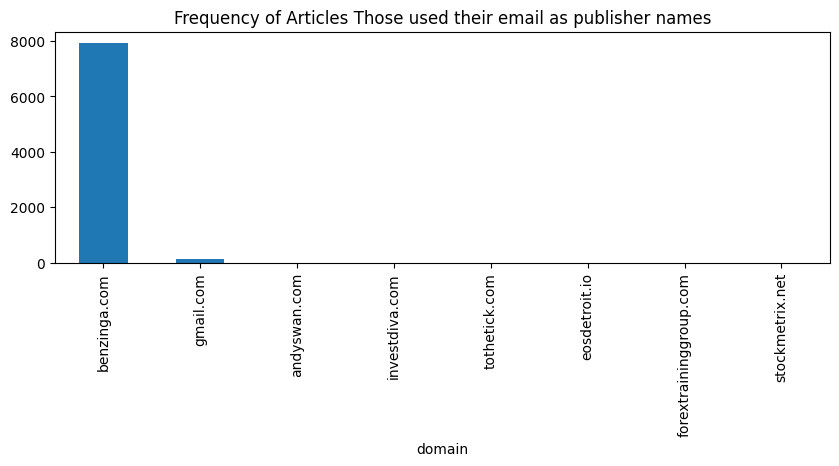

In [128]:
# Function to extract domain from email
def extract_domain(email):
    # Check if the input is a valid email address
    if re.match(r'[^@]+@[^@]+\.[^@]+', email):
        return email.split('@')[-1]
    return None

# Extract domains
data['domain'] = data['publisher'].apply(extract_domain)

# Count the frequency of each domain
domain_counts = data['domain'].value_counts()

# Display the results
print(domain_counts)

# Get top publishers within these top 10 domains
top_publishers_in_top_domains = data[data['domain'].isin(domain_counts.index)]

# Print the publisher names and corresponding domains
print("\nPublisher Names in Top 10 Domains:")
for domain in domain_counts.index:
    publishers = top_publishers_in_top_domains[top_publishers_in_top_domains['domain'] == domain]['publisher'].unique()
    print(f"\nDomain: {domain}")
    print(f"Publishers: {', '.join(publishers)}")

# Plot the results for the top 10 domains
domain_counts.plot(kind='bar', figsize=(10, 6))
plt.title('Frequency of Articles Those used their email as publisher names')
plt
